### Import Packages

In [1]:
# tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

print("Packages Imported")

Packages Imported


### Inputs

In [2]:
cwd = os.getcwd()
in_subpath = "output_final\\4 - Cross-Validation"

print("Input Path Set")

Input Path Set


## WAVE 1

WAVE 1

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 n - NN 	 Beta - NN
1 	 0.00557971 	 0.35768729
2 	 0.00595716 	 0.36033756
3 	 0.00578776 	 0.36045569
4 	 0.00575218 	 0.35662445
5 	 0.00572798 	 0.35996813
Mean 	 0.00576096 	 0.35901460
Median 	 0.00575218 	 0.35996813

MSE: 1162763.0820696065

Max Cases - Actual: 9177
Max Cases - Predicted: 10816


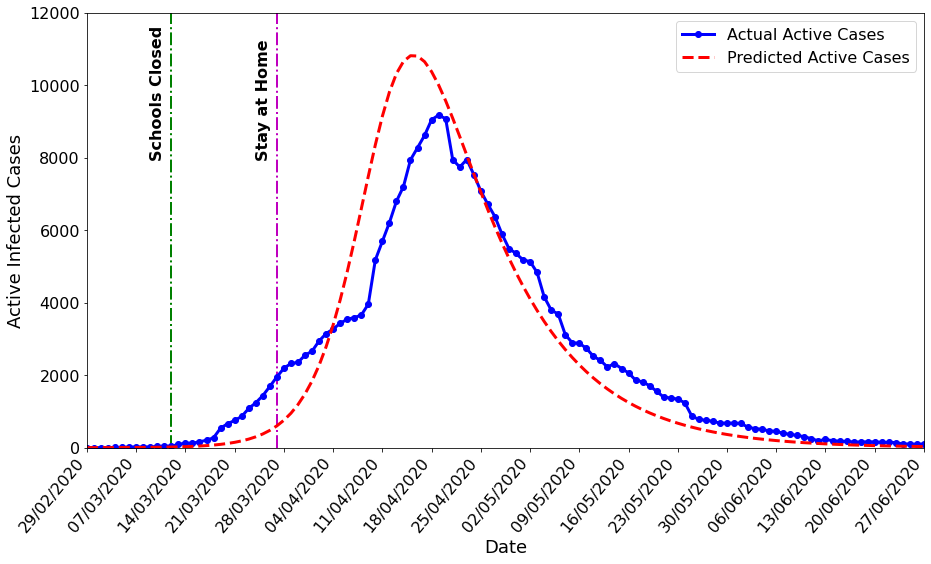

In [7]:
print("WAVE 1")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_1_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
n_fold = 5
preds_n = []
preds_beta = []

print("\nK # \t n - NN \t Beta - NN")

for i in range(0, n_fold):
    in_file = "model_sir_k{0}".format(i + 1)
    in_path = os.path.join(cwd, in_subpath, in_file)
    model = tf.keras.models.load_model(in_path)

    predictions_data = model(x_data)
    preds_n.append(predictions_data[0, 0])
    preds_beta.append(predictions_data[0, 1])

    print("{0} \t {1:.8f} \t {2:.8f}".format(i + 1, preds_n[i], preds_beta[i]))

print("{0} \t {1:.8f} \t {2:.8f}".format("Mean", np.average(preds_n), np.average(preds_beta)))
print("{0} \t {1:.8f} \t {2:.8f}".format("Median", np.median(preds_n), np.median(preds_beta)))

pred_n = float(np.median(preds_n))
pred_beta = float(np.median(preds_beta))
pred_gamma = 1.0 / 11

# SIMULATE ODE
N = N0 * pred_n
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# CALCULATE MAX CASES
print("\nMax Cases - Actual: {0:.0f}".format(max(x_raw)))
print("Max Cases - Predicted: {0:.0f}".format(max(I)))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 12000)
plt.vlines("12/03/2020", ymin=0, ymax=12000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("27/03/2020", ymin=0, ymax=12000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("09/03/2020", 8000, "Schools Closed", rotation=90, fontsize=16, fontweight="bold")
plt.text("24/03/2020", 8000, "Stay at Home", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 2

WAVE 2

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 n - NN 	 Beta - NN
1 	 0.00916541 	 0.27080953
2 	 0.01213789 	 0.27673328
3 	 0.00883028 	 0.27108568
4 	 0.01069054 	 0.27440745
5 	 0.01061425 	 0.27858537
Mean 	 0.01028767 	 0.27432427
Median 	 0.01061425 	 0.27440745

MSE: 11353720.692160487

Max Cases - Actual: 11949
Max Cases - Predicted: 14974


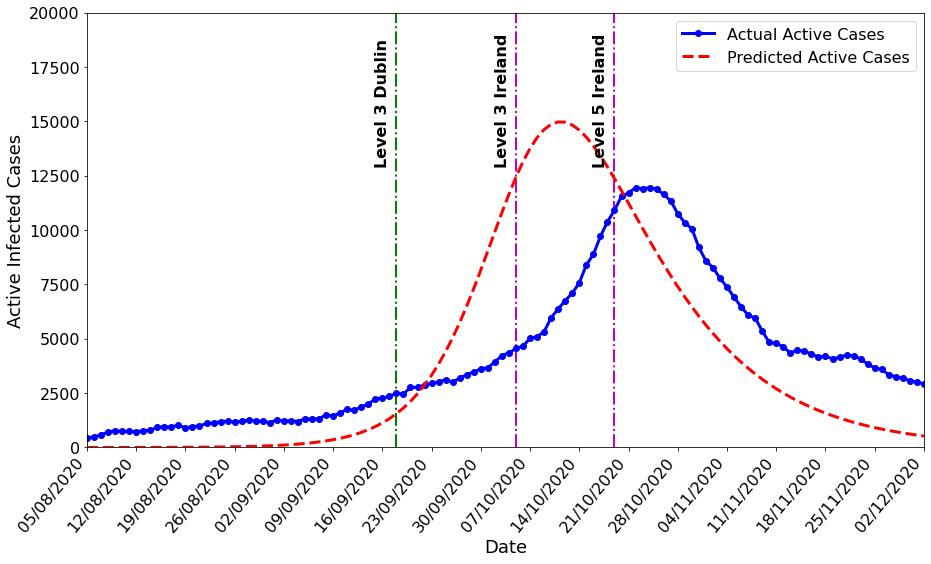

In [11]:
print("WAVE 2")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_2_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
n_fold = 5
preds_n = []
preds_beta = []

print("\nK # \t n - NN \t Beta - NN")

for i in range(0, n_fold):
    in_file = "model_sir_k{0}".format(i + 1)
    in_path = os.path.join(cwd, in_subpath, in_file)
    model = tf.keras.models.load_model(in_path)

    predictions_data = model(x_data)
    preds_n.append(predictions_data[0, 0])
    preds_beta.append(predictions_data[0, 1])

    print("{0} \t {1:.8f} \t {2:.8f}".format(i + 1, preds_n[i], preds_beta[i]))

print("{0} \t {1:.8f} \t {2:.8f}".format("Mean", np.average(preds_n), np.average(preds_beta)))
print("{0} \t {1:.8f} \t {2:.8f}".format("Median", np.median(preds_n), np.median(preds_beta)))

pred_n = float(np.median(preds_n))
pred_beta = float(np.median(preds_beta))
pred_gamma = 1.0 / 11

# SIMULATE ODE
N = N0 * pred_n
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# CALCULATE MAX CASES
print("\nMax Cases - Actual: {0:.0f}".format(max(x_raw)))
print("Max Cases - Predicted: {0:.0f}".format(max(I)))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 20000)
plt.vlines("18/09/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("05/10/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="m")
plt.vlines("19/10/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("15/09/2020", 13000, "Level 3 Dublin", rotation=90, fontsize=16, fontweight="bold")
plt.text("02/10/2020", 13000, "Level 3 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.text("16/10/2020", 13000, "Level 5 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 3

WAVE 3

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 n - NN 	 Beta - NN
1 	 0.03320864 	 0.45515516
2 	 0.03438899 	 0.45047593
3 	 0.03151387 	 0.45918885
4 	 0.03141114 	 0.44614637
5 	 0.03129536 	 0.45407456
Mean 	 0.03236360 	 0.45300817
Median 	 0.03151387 	 0.45407456

MSE: 42169353.75029881

Max Cases - Actual: 62218
Max Cases - Predicted: 71498


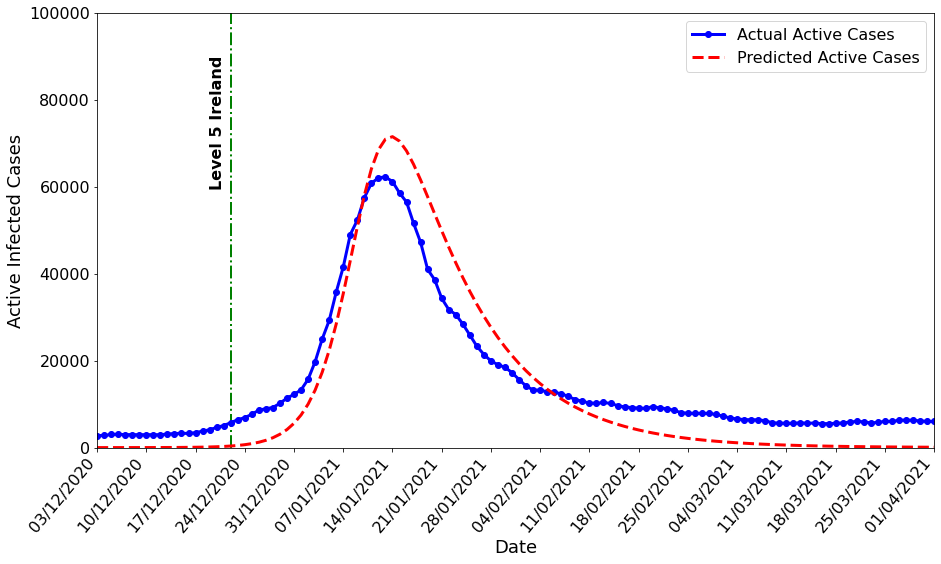

In [9]:
print("WAVE 3")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_3_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
n_fold = 5
preds_n = []
preds_beta = []

print("\nK # \t n - NN \t Beta - NN")

for i in range(0, n_fold):
    in_file = "model_sir_k{0}".format(i + 1)
    in_path = os.path.join(cwd, in_subpath, in_file)
    model = tf.keras.models.load_model(in_path)

    predictions_data = model(x_data)
    preds_n.append(predictions_data[0, 0])
    preds_beta.append(predictions_data[0, 1])

    print("{0} \t {1:.8f} \t {2:.8f}".format(i + 1, preds_n[i], preds_beta[i]))

print("{0} \t {1:.8f} \t {2:.8f}".format("Mean", np.average(preds_n), np.average(preds_beta)))
print("{0} \t {1:.8f} \t {2:.8f}".format("Median", np.median(preds_n), np.median(preds_beta)))

pred_n = float(np.median(preds_n))
pred_beta = float(np.median(preds_beta))
pred_gamma = 1.0 / 11

# SIMULATE ODE
N = N0 * pred_n
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# CALCULATE MAX CASES
print("\nMax Cases - Actual: {0:.0f}".format(max(x_raw)))
print("Max Cases - Predicted: {0:.0f}".format(max(I)))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 100000)
plt.vlines("22/12/2020", ymin=0, ymax=100000, linestyles="dashdot", linewidth=2, colors="g")
plt.text("19/12/2020", 60000, "Level 5 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 4

WAVE 4

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 n - NN 	 Beta - NN
1 	 0.01816756 	 0.28605187
2 	 0.02835026 	 0.29811263
3 	 0.01818290 	 0.27352554
4 	 0.01898947 	 0.28634599
5 	 0.02104861 	 0.28181237
Mean 	 0.02094776 	 0.28516969
Median 	 0.01898947 	 0.28605187

MSE: 71844894.7927833

Max Cases - Actual: 20385
Max Cases - Predicted: 28181


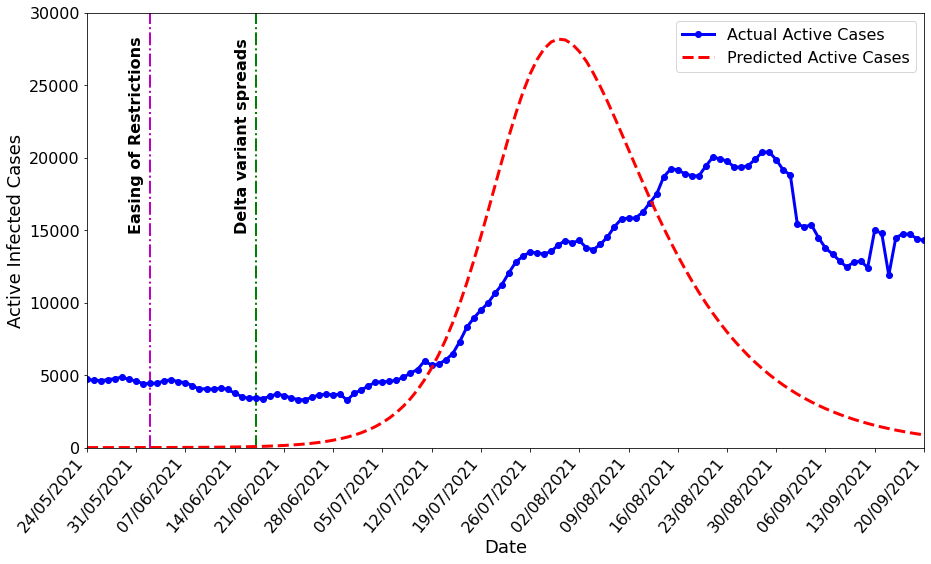

In [16]:
print("WAVE 4")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_4_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
n_fold = 5
preds_n = []
preds_beta = []

print("\nK # \t n - NN \t Beta - NN")

for i in range(0, n_fold):
    in_file = "model_sir_k{0}".format(i + 1)
    in_path = os.path.join(cwd, in_subpath, in_file)
    model = tf.keras.models.load_model(in_path)

    predictions_data = model(x_data)
    preds_n.append(predictions_data[0, 0])
    preds_beta.append(predictions_data[0, 1])

    print("{0} \t {1:.8f} \t {2:.8f}".format(i + 1, preds_n[i], preds_beta[i]))

print("{0} \t {1:.8f} \t {2:.8f}".format("Mean", np.average(preds_n), np.average(preds_beta)))
print("{0} \t {1:.8f} \t {2:.8f}".format("Median", np.median(preds_n), np.median(preds_beta)))

pred_n = float(np.median(preds_n))
pred_beta = float(np.median(preds_beta))
pred_gamma = 1.0 / 11

# SIMULATE ODE
N = N0 * pred_n
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# CALCULATE MAX CASES
print("\nMax Cases - Actual: {0:.0f}".format(max(x_raw)))
print("Max Cases - Predicted: {0:.0f}".format(max(I)))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 30000)
plt.vlines("17/06/2021", ymin=0, ymax=30000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("02/06/2021", ymin=0, ymax=30000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("14/06/2021", 15000, "Delta variant spreads", rotation=90, fontsize=16, fontweight="bold")
plt.text("30/05/2021", 15000, "Easing of Restrictions", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()